[Google Drive Link to CSV files](https://drive.google.com/drive/folders/1xIwEB87yODWaI1VFm7n7HUMI6KRwRAav)

# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn


## Data importation


In [2]:
prefix = '/content/drive'
from google.colab import drive
drive.mount(prefix, force_remount=True)

Mounted at /content/drive


In [3]:
file1 = '/content/drive/My Drive/CIS550/species.csv'
file2 = "/content/drive/My Drive/CIS550/AllTrails data - nationalpark.csv"
file3 = "/content/drive/My Drive/CIS550/parks.csv"
file4 = "/content/drive/Shared drives/CIS5500: Databases Project/Data/airbnb_listings_usa.csv"

In [4]:
species = pd.read_csv(file1)
trails = pd.read_csv(file2)
parks = pd.read_csv(file3)
airbnb = pd.read_csv(file4)

<ipython-input-4-95ea9d42eb18>:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  species = pd.read_csv(file1)
<ipython-input-4-95ea9d42eb18>:4: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb = pd.read_csv(file4)


## Initial Exploration

In [5]:
species.head()

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Unnamed: 13
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN,NaN
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN,NaN
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern,NaN
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered,NaN
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN,NaN


In [6]:
trails.head()

,trail_id,name,area_name,city_name,state_name,country_name,_geoloc,popularity,length,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,units
0,10020048,Harding Ice Field Trail,Kenai Fjords National Park,Seward,Alaska,United States,"{'lat': 60.18852, 'lng': -149.63156}",24.8931,15610.598,1161.8976,5,out and back,3.0,5.0,423,"['dogs-no', 'forest', 'river', 'views', 'water...","['birding', 'camping', 'hiking', 'nature-trips...",i
1,10236086,Mount Healy Overlook Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73049, 'lng': -148.91968}",18.0311,6920.162,507.7968,3,out and back,1.0,4.5,260,"['dogs-no', 'forest', 'views', 'wild-flowers',...","['birding', 'camping', 'hiking', 'nature-trips...",i
2,10267857,Exit Glacier Trail,Kenai Fjords National Park,Seward,Alaska,United States,"{'lat': 60.18879, 'lng': -149.631}",17.7821,2896.812,81.9912,1,out and back,3.0,4.5,224,"['dogs-no', 'partially-paved', 'views', 'wildl...","['hiking', 'walking']",i
3,10236076,Horseshoe Lake Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73661, 'lng': -148.915}",16.2674,3379.614,119.7864,1,loop,2.0,4.5,237,"['dogs-no', 'forest', 'lake', 'kids', 'views',...","['birding', 'hiking', 'nature-trips', 'trail-r...",i
4,10236082,Triple Lakes Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73319, 'lng': -148.89682}",12.5935,29772.790,1124.7120,5,out and back,1.0,4.5,110,"['dogs-no', 'lake', 'views', 'wild-flowers', '...","['birding', 'fishing', 'hiking', 'nature-trips...",i


In [7]:
parks.head()

,Park Code,Park Name,State,Acres,Latitude,Longitude
0,ACAD,Acadia National Park,ME,47390,44.35,-68.21
1,ARCH,Arches National Park,UT,76519,38.68,-109.57
2,BADL,Badlands National Park,SD,242756,43.75,-102.50
3,BIBE,Big Bend National Park,TX,801163,29.25,-103.25
4,BISC,Biscayne National Park,FL,172924,25.65,-80.08


In [8]:
airbnb.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,...,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,state,city
0,0,183319,Panoramic Ocean View Venice Beach,867995,Barbara X,City of Los Angeles,Venice,33.99211,-118.47600,Entire home/apt,...,30,3,2019-02-25,0.02,2,0,0,NaN,CA,Los Angeles
1,1,109,Amazing bright elegant condo park front *UPGRA...,521,Paolo,Other Cities,Culver City,33.98301,-118.38607,Entire home/apt,...,30,2,2016-05-15,0.01,1,139,0,NaN,CA,Los Angeles
2,2,51307,Spanish Bungalow Guest House LA CA. 30 plus ni...,235568,David,City of Los Angeles,Atwater Village,34.12206,-118.26783,Entire home/apt,...,30,138,2020-12-13,0.98,2,224,0,NaN,CA,Los Angeles
3,3,184314,Boho Chic Flat..Steps to Beach!,884031,Ashley,City of Los Angeles,Venice,33.97487,-118.46312,Entire home/apt,...,30,30,2017-12-24,0.22,1,0,0,NaN,CA,Los Angeles
4,4,51498,Guest House With Its Own Entrance/Exit and Hot...,236758,Bay,City of Los Angeles,Mar Vista,34.00389,-118.44126,Entire home/apt,...,3,378,2022-08-21,2.60,1,348,41,HSR19-001336,CA,Los Angeles


### Dataset Size Measurement


In [ ]:
parks.dtypes

Park Code     object
Park Name     object
State         object
Acres          int64
Latitude     float64
Longitude    float64
dtype: object

In [ ]:
trails.dtypes

trail_id               int64
name                  object
area_name             object
city_name             object
state_name            object
country_name          object
_geoloc               object
popularity           float64
length               float64
elevation_gain       float64
difficulty_rating      int64
route_type            object
visitor_usage        float64
avg_rating           float64
num_reviews            int64
features              object
activities            object
units                 object
dtype: object

In [ ]:
species.dtypes

Species ID             object
Park Name              object
Category               object
Order                  object
Family                 object
Scientific Name        object
Common Names           object
Record Status          object
Occurrence             object
Nativeness             object
Abundance              object
Seasonality            object
Conservation Status    object
Unnamed: 13            object
dtype: object

In [ ]:
airbnb.dtypes

Unnamed: 0                          int64
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
state                              object
city                               object
dtype: object

In [ ]:
parks.shape  

(56, 6)

In [ ]:
trails.shape

(3313, 18)

In [ ]:
species.shape

(119248, 14)

In [ ]:
airbnb.shape

(325858, 21)

In [ ]:
usage_by_col = airbnb.memory_usage(deep=True) # returns memory usage for each column
total_usage = usage_by_col.sum()
mbs = total_usage / 1e6 # convert to megabytes 
mbs

222.811608

## Missing Value Detection


In [ ]:
parks.isnull().any()

Park Code    False
Park Name    False
State        False
Acres        False
Latitude     False
Longitude    False
dtype: bool

In [ ]:
trails.isnull().any()

trail_id             False
name                 False
area_name            False
city_name            False
state_name           False
country_name         False
_geoloc              False
popularity           False
length               False
elevation_gain       False
difficulty_rating    False
route_type           False
visitor_usage         True
avg_rating           False
num_reviews          False
features             False
activities           False
units                False
dtype: bool

In [ ]:
a = ""
for col in airbnb.columns:
  a = a + col + ", "
print(a)

Unnamed: 0, id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365, number_of_reviews_ltm, license, state, city, 


In [ ]:
species.isnull().any()

Species ID             False
Park Name              False
Category               False
Order                   True
Family                  True
Scientific Name        False
Common Names           False
Record Status          False
Occurrence              True
Nativeness              True
Abundance               True
Seasonality             True
Conservation Status     True
Unnamed: 13             True
dtype: bool

In [ ]:
airbnb.isnull().any()

Unnamed: 0                        False
id                                False
name                               True
host_id                           False
host_name                          True
neighbourhood_group                True
neighbourhood                      True
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                        True
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
number_of_reviews_ltm             False
license                            True
state                             False
city                              False
dtype: bool

In [ ]:
for col in parks.columns:  # iterate over all columns
    print('Unique Values for {}'.format(col))  
    print(parks[col].unique())   
    print('')
print("END OF PARK DATA ANALYSIS!")

for col in trails.columns:  # iterate over all columns
    print('Unique Values for {}'.format(col))  
    print(trails[col].unique())   
    print('')
print("END OF TRAIL DATA ANALYSIS!")

for col in species.columns:  # iterate over all columns
    print('Unique Values for {}'.format(col))  
    print(species[col].unique())   
    print('')
for col in airbnb.columns:  # iterate over all columns
    print('Unique Values for {}'.format(col))  
    print(airbnb[col].unique())   
    print('')

Unique Values for Park Code
['ACAD' 'ARCH' 'BADL' 'BIBE' 'BISC' 'BLCA' 'BRCA' 'CANY' 'CARE' 'CAVE'
 'CHIS' 'CONG' 'CRLA' 'CUVA' 'DENA' 'DEVA' 'DRTO' 'EVER' 'GAAR' 'GLAC'
 'GLBA' 'GRBA' 'GRCA' 'GRSA' 'GRSM' 'GRTE' 'GUMO' 'HALE' 'HAVO' 'HOSP'
 'ISRO' 'JOTR' 'KATM' 'KEFJ' 'KOVA' 'LACL' 'LAVO' 'MACA' 'MEVE' 'MORA'
 'NOCA' 'OLYM' 'PEFO' 'PINN' 'REDW' 'ROMO' 'SAGU' 'SEKI' 'SHEN' 'THRO'
 'VOYA' 'WICA' 'WRST' 'YELL' 'YOSE' 'ZION']

Unique Values for Park Name
['Acadia National Park' 'Arches National Park' 'Badlands National Park'
 'Big Bend National Park' 'Biscayne National Park'
 'Black Canyon of the Gunnison National Park' 'Bryce Canyon National Park'
 'Canyonlands National Park' 'Capitol Reef National Park'
 'Carlsbad Caverns National Park' 'Channel Islands National Park'
 'Congaree National Park' 'Crater Lake National Park'
 'Cuyahoga Valley National Park' 'Denali National Park and Preserve'
 'Death Valley National Park' 'Dry Tortugas National Park'
 'Everglades National Park'
 'Gates Of T

In [22]:
trails.isnull().sum()

trail_id               0
name                   0
area_name              0
city_name              0
state_name             0
country_name           0
_geoloc                0
popularity             0
length                 0
elevation_gain         0
difficulty_rating      0
route_type             0
visitor_usage        253
avg_rating             0
num_reviews            0
features               0
activities             0
units                  0
dtype: int64

In [23]:
species.isnull().sum()

Species ID                  0
Park Name                   0
Category                    0
Order                    1472
Family                   1512
Scientific Name             0
Common Names                0
Record Status               0
Occurrence              20142
Nativeness              25045
Abundance               42942
Seasonality             99091
Conservation Status    114530
Unnamed: 13            119243
dtype: int64

In [24]:
airbnb.isnull().sum()

Unnamed: 0                             0
id                                     0
name                                  19
host_id                                0
host_name                           1144
neighbourhood_group               170811
neighbourhood                        712
latitude                               0
longitude                              0
room_type                              0
price                                  0
minimum_nights                         0
number_of_reviews                      0
last_review                        62692
reviews_per_month                  62692
calculated_host_listings_count         0
availability_365                       0
number_of_reviews_ltm                  0
license                           239223
state                                  0
city                                   0
dtype: int64

## Misentered Value Detection



In [12]:
parks.max()

Park Code                  ZION
Park Name    Zion National Park
State                WY, MT, ID
Acres                   8323148
Latitude                  67.78
Longitude                -68.21
dtype: object

In [13]:
parks.min()

Park Code                    ACAD
Park Name    Acadia National Park
State                          AK
Acres                        5550
Latitude                    19.38
Longitude                 -159.28
dtype: object

In [14]:
species.max()

<ipython-input-14-5ad270b7d547>:1: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  species.max()


Species ID                  ZION-2795
Park Name          Zion National Park
Category               Vascular Plant
Scientific Name         physa virgata
Common Names               ´_Wikiwiki
Record Status             P.Nut Sedge
dtype: object

In [15]:
species.min()

<ipython-input-15-7da4fe62a157>:1: FutureWarning: The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  species.min()


Species ID                                                 ACAD-1000
Park Name                                       Acadia National Park
Category                                                       Algae
Scientific Name                                           Aaptolasma
Common Names       "Tropical" Kingbird,In Review,Present,Not Nati...
Record Status                                                      *
dtype: object

In [16]:
trails.max()

trail_id                                                 10545419
name                 Zumwalt Meadow Trail to Kanawyers Trail Loop
area_name                                      Zion National Park
city_name                                            Yucca Valley
state_name                                                Wyoming
country_name                                        United States
_geoloc                      {'lat': 63.88374, 'lng': -149.26764}
popularity                                                84.6229
length                                                 529794.728
elevation_gain                                          14029.944
difficulty_rating                                               7
route_type                                         point to point
visitor_usage                                                 4.0
avg_rating                                                    5.0
num_reviews                                                  3903
features  

In [17]:
trails.min()

trail_id                                                      10000013
name                         1.5 Mile Resthouse via Bright Angel Trail
area_name                                         Acadia National Park
city_name                                                        Afton
state_name                                                      Alaska
country_name                                                    Hawaii
_geoloc                           {'lat': 19.08609, 'lng': -155.68402}
popularity                                                         0.0
length                                                             0.0
elevation_gain                                                     0.0
difficulty_rating                                                    1
route_type                                                        loop
visitor_usage                                                      1.0
avg_rating                                                         0.0
num_re

In [18]:
airbnb.max()

<ipython-input-18-e5059d685668>:1: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  airbnb.max()


Unnamed: 0                                    325857
id                                725165330340190849
host_id                                    481002317
latitude                                      47.748
longitude                                  -70.91325
room_type                                Shared room
price                                         100000
minimum_nights                                  1250
number_of_reviews                               2600
reviews_per_month                             190.48
calculated_host_listings_count                   660
availability_365                                 365
number_of_reviews_ltm                           1284
state                                             WA
city                                 Washington D.C.
dtype: object

In [19]:
airbnb.min()

<ipython-input-19-9034cf5affba>:1: FutureWarning: The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  airbnb.min()


Unnamed: 0                                      0
id                                            109
host_id                                        23
latitude                                 18.92025
longitude                              -159.71462
room_type                         Entire home/apt
price                                           0
minimum_nights                                  1
number_of_reviews                               0
reviews_per_month                            0.01
calculated_host_listings_count                  1
availability_365                                0
number_of_reviews_ltm                           0
state                                          CA
city                                    Asheville
dtype: object

Looking at the above minumum and maximum values for each attributes for every dataframe, we can see that there isn't any misentered values. 

## Distribution Examination



In [ ]:
parks.describe()

,Acres,Latitude,Longitude
count,5.600000e+01,56.000000,56.000000
mean,9.279291e+05,41.233929,-113.234821
std,1.709258e+06,10.908831,22.440287
min,5.550000e+03,19.380000,-159.280000
25%,6.901050e+04,35.527500,-121.570000
50%,2.387645e+05,38.550000,-110.985000
75%,8.173602e+05,46.880000,-103.400000
max,8.323148e+06,67.780000,-68.210000


In [9]:
trails.describe()

,trail_id,popularity,length,elevation_gain,difficulty_rating,visitor_usage,avg_rating,num_reviews
count,3.313000e+03,3313.000000,3313.000000,3313.000000,3313.000000,3060.000000,3313.000000,3313.000000
mean,1.018506e+07,8.953441,17676.848717,641.805943,3.167824,1.877124,4.173106,70.341986
std,1.503248e+05,8.138323,25497.376640,901.506642,1.702752,0.693641,0.947039,184.118370
min,1.000001e+07,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,1.002853e+07,3.794100,4506.152000,116.738400,1.000000,1.000000,4.000000,5.000000
50%,1.023781e+07,6.573100,10621.644000,359.968800,3.000000,2.000000,4.500000,17.000000
75%,1.029234e+07,11.255600,21404.222000,833.932800,5.000000,2.000000,4.500000,57.000000
max,1.054542e+07,84.622900,529794.728000,14029.944000,7.000000,4.000000,5.000000,3903.000000


In [10]:
species.describe()

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Unnamed: 13
count,119248,119248,119248,117776,117736,119248,119248,119248,99106,94203,76306,20157,4718,5
unique,119248,56,14,554,2332,46022,35826,54,7,5,8,24,11,3
top,ACAD-1000,Great Smoky Mountains National Park,Vascular Plant,Poales,Asteraceae,Falco peregrinus,None,Approved,Present,Native,Unknown,Breeder,Species of Concern,Threatened
freq,1,6623,65221,11453,8843,56,27147,86254,83278,75950,28119,12214,3843,2


In [11]:
airbnb.describe()

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,325858.000000,3.258580e+05,3.258580e+05,325858.000000,325858.000000,325858.000000,325858.000000,325858.000000,263166.00000,325858.000000,325858.000000,325858.000000
mean,162928.500000,1.541106e+17,1.446528e+08,34.676058,-106.354815,284.915304,13.430175,39.457850,1.69220,27.108900,182.361099,11.889817
std,94067.246346,2.736013e+17,1.449951e+08,6.213029,24.176674,835.569711,28.783033,75.724832,2.01294,79.983052,134.095115,20.672830
min,0.000000,1.090000e+02,2.300000e+01,18.920250,-159.714620,0.000000,1.000000,0.000000,0.01000,1.000000,0.000000,0.000000
25%,81464.250000,2.394619e+07,2.311836e+07,32.775202,-118.410259,97.000000,2.000000,1.000000,0.33000,1.000000,55.000000,0.000000
50%,162928.500000,4.511097e+07,9.320864e+07,34.102360,-117.131590,159.000000,3.000000,9.000000,1.01000,2.000000,174.000000,3.000000
75%,244392.750000,5.420558e+07,2.388338e+08,39.948015,-82.549423,275.000000,30.000000,42.000000,2.49000,12.000000,322.000000,16.000000
max,325857.000000,7.251653e+17,4.810023e+08,47.748000,-70.913250,100000.000000,1250.000000,2600.000000,190.48000,660.000000,365.000000,1284.000000


In [ ]:
trails[["popularity","length","elevation_gain","difficulty_rating","visitor_usage","avg_rating"]].describe()

,popularity,length,elevation_gain,difficulty_rating,visitor_usage,avg_rating
count,3313.000000,3313.000000,3313.000000,3313.000000,3060.000000,3313.000000
mean,8.953441,17676.848717,641.805943,3.167824,1.877124,4.173106
std,8.138323,25497.376640,901.506642,1.702752,0.693641,0.947039
min,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,3.794100,4506.152000,116.738400,1.000000,1.000000,4.000000
50%,6.573100,10621.644000,359.968800,3.000000,2.000000,4.500000
75%,11.255600,21404.222000,833.932800,5.000000,2.000000,4.500000
max,84.622900,529794.728000,14029.944000,7.000000,4.000000,5.000000


<AxesSubplot:>

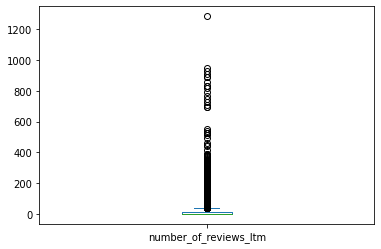

In [ ]:
airbnb["number_of_reviews_ltm"].plot(kind="box")

<AxesSubplot:>

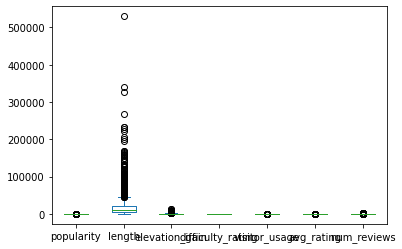

In [ ]:
trails[["popularity","length","elevation_gain","difficulty_rating","visitor_usage","avg_rating","num_reviews"]].plot(kind='box')

<AxesSubplot:>

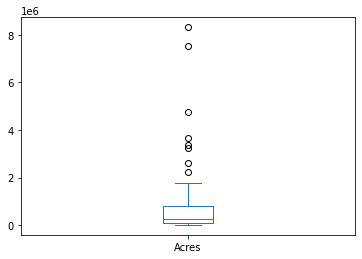

In [ ]:
parks["Acres"].plot(kind='box')